In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# G = nx.cycle_graph(4)

In [3]:
# nx.draw(G, node_size=150, node_color='blue')

In [4]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])

In [5]:
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 1)

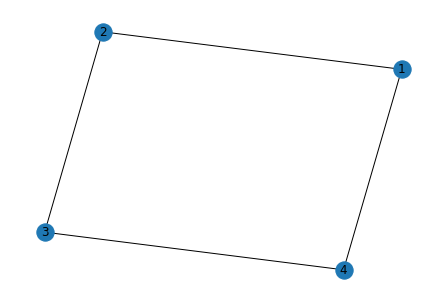

In [6]:
nx.draw(G, with_labels=True)
plt.show()

In [7]:
copyCatList = [2,4]
attenList = [3]
ampList = [1]

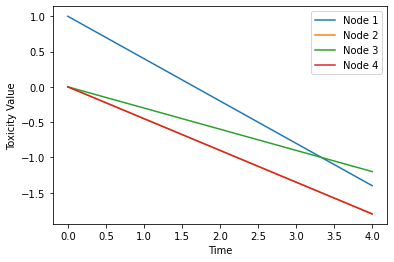

In [19]:
toxicity_values = {node: [0] * 5 for node in G.nodes()} # initialize the toxicity values for each node

# set the initial toxicity value for node 1
toxicity_values[1][0] = 1

# set the toxicity value shift for each node category
shifts = {
    'copyCatList': 0.1,
    'attenList': 0.05,
    'ampList': 0.2
}

# run the simulation
for t in range(1, 5):
    for node in G.nodes():
        # determine the node category
        if node in copyCatList:
            category = 'copyCatList'
        elif node in attenList:
            category = 'attenList'
        else:
            category = 'ampList'
        
        # calculate the toxicity value shift for this node category
        shift = shifts[category]
        
        # calculate the new toxicity value based on the neighbors' toxicity values
        neighbors = list(G.neighbors(node))
        new_toxicity = toxicity_values[node][t-1] - shift * len(neighbors)
        for neighbor in neighbors:
            if neighbor in copyCatList:
                new_toxicity -= shifts['copyCatList']
            elif neighbor in attenList:
                new_toxicity -= shifts['attenList']
            else:
                new_toxicity -= shifts['ampList']
        
        # set the new toxicity value for this node at this time step
        toxicity_values[node][t] = new_toxicity

# plot the results
for node in G.nodes():
    plt.plot(range(5), toxicity_values[node], label='Node {}'.format(node))
plt.xlabel('Time')
plt.ylabel('Toxicity Value')
plt.legend()
plt.show()

In [9]:
'''
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 1)

copyCatList = [2,4]
attenList = [3]
ampList = [1]

I have this code, and I want to run a simulation in this graph. The simulation should look something like this. 

Here the nodes have 3 categories, and there are three lists that contain the types of nodes. The list names are copyCatList, attenList, ampList.

At time stamp 0, node 1 will have some value, let's call this the toxicity value. The toxicity value for node 1 and t=0 will be 1. 
in the simulation, based on the type of the node, each node will get a toxicity value shift. The toxicity value shifts are as follows for each node category
copyCatList - 0.1
attenList - 0.05
ampList - 0.2

Now let's continue the simulation, 
at t=1, the simulation will go to the neighbours of node 1, i.e. nodes 2 and 4, and based on their node category they will get a shift. Here both nodes 2 and 4 are in the copyCatList, so the values of nodes 2 and 4 will become (1-0.05), i.e. 0.95, nodes 2 and 4 will have the value 0.95. 
at t=2, the simulation will go to the neighbours of nodes 2 and 4, i.e node 3, and based on the category of the node, the node will get a shift. Here node 3 is in the attenList, so the value of node 3 will become (0.95-0.2) i.e. 0.75, i.e. each node 3 will have a value of 0.75. 
at t=3, the simulation will go to the neighbours of node 3, i.e. nodes 2 and 4. and based on the category of the node, the node will get a shift. Here nodes 2 and 4 are in the copyCatList, so the value of nodes 2 and 4 will become (0.75 - 0.1) i.e. 0.65 i.e. each node 2 and 4 will have a value of 0.65 now. 
at t=4, the simulation will go to the neighbours of nodes 2 and 4, i.e. node 1, and based on the category of the node, the node will get a shift. Here node 1 is the ampList, so the value of node 1 will become (0.65-0.2) i.e. 0.45 i.e. node 1 will have a value of 0.45 now. 

The simulation ends here, as it started with node 1 and it ends at node 1. How do I program this in python, where I can see the value of each node at each time stamp. 
'''

'\nnow I want to run a simulation in this graph for each timestamp, \nat t=1 node 1 will have value of 1, at t=2 the neighbors of node 1, i.e 2,4 will get some values that are a shift of 1, now do I code this\n'